Head of the DataFrame:
  observation_date  CPIAUCSL
0       01/01/1947     21.48
1       01/02/1947     21.62
2       01/03/1947     22.00
3       01/04/1947     22.00
4       01/05/1947     21.95

DataFrame with date as index:
                  CPIAUCSL
observation_date          
1947-01-01           21.48
1947-01-02           21.62
1947-01-03           22.00
1947-01-04           22.00
1947-01-05           21.95

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939 entries, 1947-01-01 to 2025-01-03
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  939 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB
None

DataFrame with CPI Percentage Change:
                  CPIAUCSL  CPI_Percentage_Change
observation_date                                 
1947-01-02           21.62               0.651769
1947-01-03           22.00               1.757632
1947-01-04           22.00        

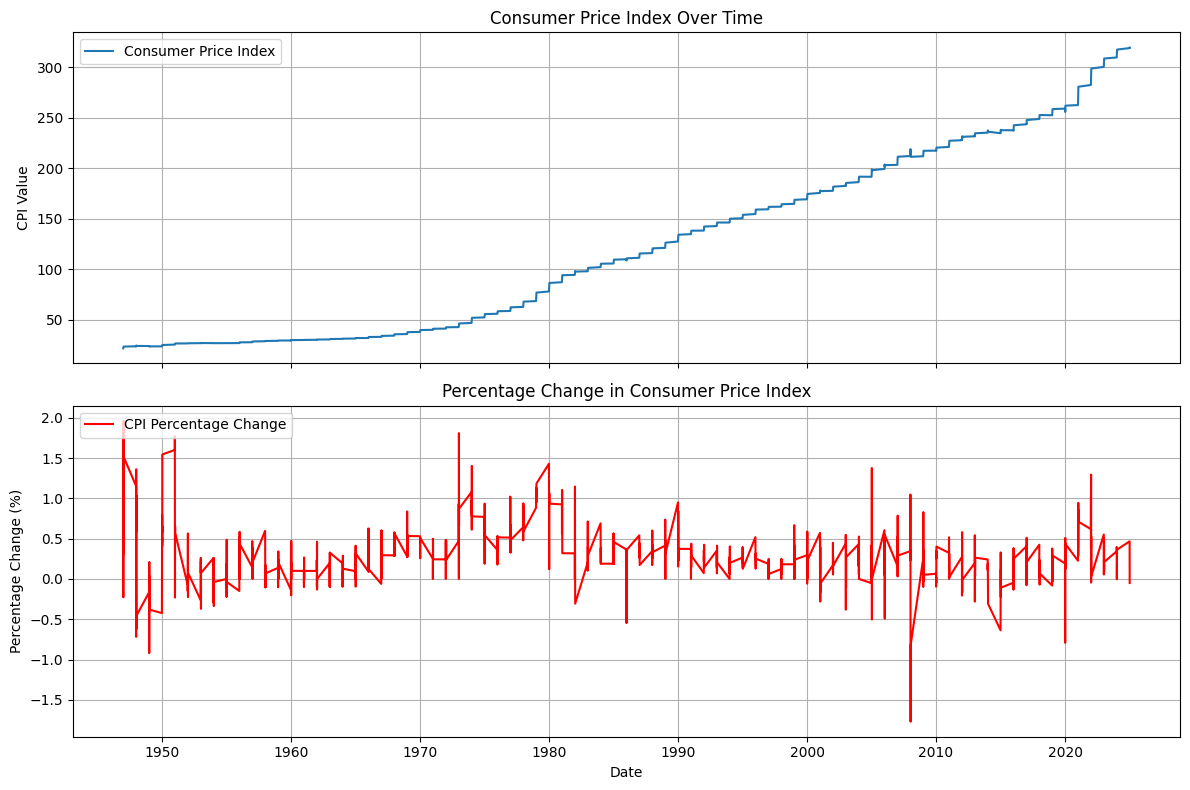

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Configuration ---
file_path = 'C:/Users/USER/Downloads/CPIAUCSL.csv'  # Replace with the actual path to your CSV file
date_column = 'observation_date'
price_column = 'CPIAUCSL'
date_format = '%m/%d/%Y'

# --- Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Head of the DataFrame:")
    print(df.head())

    # Convert the date column to datetime objects and set as index
    df[date_column] = pd.to_datetime(df[date_column], format=date_format)
    df.set_index(date_column, inplace=True)
    df = df.sort_index()
    df = df.dropna(subset=[price_column])

    print("\nDataFrame with date as index:")
    print(df.head())
    print("\nInfo of the DataFrame:")
    print(df.info())

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except KeyError as e:
    print(f"Error: Column '{e}' not found in the CSV file. Please check the column names.")
    exit()
except ValueError as e:
    print(f"Error: Could not parse date. Please check the 'date_format' variable. Details: {e}")
    exit()

# --- Calculate the percentage change in CPI ---
if not df.empty:
    df['CPI_Percentage_Change'] = df[price_column].pct_change() * 100
    df = df.dropna(subset=['CPI_Percentage_Change'])  # Remove the first row with NaN

    print("\nDataFrame with CPI Percentage Change:")
    print(df.head())

    # --- Plot the CPI and percentage change ---
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

    # Plot the CPI
    axes[0].plot(df.index, df[price_column], label='Consumer Price Index')
    axes[0].set_ylabel('CPI Value')
    axes[0].set_title('Consumer Price Index Over Time')
    axes[0].legend(loc='upper left')
    axes[0].grid(True)

    # Plot the Percentage Change in CPI
    axes[1].plot(df.index, df['CPI_Percentage_Change'], label='CPI Percentage Change', color='red')
    axes[1].set_ylabel('Percentage Change (%)')
    axes[1].set_title('Percentage Change in Consumer Price Index')
    axes[1].legend(loc='upper left')
    axes[1].grid(True)

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame is empty, cannot perform analysis or plot.")